The objective of this project is to classify 32*32 RGB pictures from the CIFAR10 dataset

    This is what the input data looks like:

Loading files...
Loaded: inputs/datasets/cifar10/data_batch_1
Loaded: inputs/datasets/cifar10/data_batch_2
Loaded: inputs/datasets/cifar10/data_batch_3
Loaded: inputs/datasets/cifar10/data_batch_4
Loaded: inputs/datasets/cifar10/data_batch_5
Loaded: inputs/datasets/cifar10/test_batch


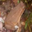

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


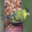

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


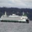

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


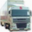

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


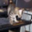

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


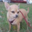

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


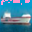

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


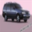

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


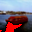

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


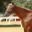

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [1]:
from helpers.extractor import *
#network.Plot()
loader = CifarLoader("inputs/datasets/cifar10/", "RGB")

for k in range(10):
    imgData=loader.getNextBatch(1)
    imgClass=imgData[1][0]
    data = imgData[0][0]
    img = Image.new( 'RGBA', (32,32), "white")
    pixels = img.load()

    for i in range(img.size[0]*img.size[1]):    # for every pixel:
            r = int(data[i]*255)
            g = int(data[32*32+i]*255)
            b = int(data[32*32*2+i]*255)
            
            x  = i%img.size[0]
            y = int(i/img.size[0])
            pixels[x,y] = (r, g, b, 255) # set the colour accordingly

    display(img)
    print(imgClass)

    ConvNet Classification:

In [ ]:
from helpers.extractor import *
from helpers.neural_network import *

loader = CifarLoader("inputs/datasets/cifar10/", "RGB")
network = ConvNet(loader, 
                  n_steps = 32*3,
                  training_iters=10000, 
                  display_step=1, 
                  learning_rate = 0.001, 
                  batch_size=128)

x=tf.placeholder("float", [None, 32*3, 32])

layers = []
layers.append(NNOperation("reshape", [-1, 32*3, 32, 1]))
layers.append(NNOperation("conv2d", [3, 3, 1, 32]))
layers.append(NNOperation("maxpool2d", 2)) #16
layers.append(NNOperation("conv2d", [3, 3, 32, 64]))
layers.append(NNOperation("maxpool2d", 2)) #8
layers.append(NNOperation("conv2d", [3, 3, 64, 128]))
layers.append(NNOperation("maxpool2d", 2)) #4
layers.append(NNOperation("reshape", [-1, 12*128, 4]))
layers.append(NNOperation("local", [12*128*4, 1024], [1024]))
layers.append(NNOperation("local", [1024, 256], [256]))
layers.append(NNOperation("relu"))
layers.append(NNOperation("dropout", self.dropout))
layers.append(NNOperation("local", [256, 10], [10]))

network.Run(x=x, layers=layers, save_path="graphs/Cifar10Graph")

    LSTM Classification:

In [ ]:
from helpers.extractor import *
from helpers.neural_network import *

loader = CifarLoader("inputs/datasets/cifar10/", "RGB")
network = ConvNet(loader, 
                  n_steps = 32*3,
                  training_iters=10000, 
                  display_step=1, 
                  learning_rate = 0.001, 
                  batch_size=128)

x=tf.placeholder("float", [None, 32*3, 32])

layers = []
layers.append(LSTMOperation(cells=[64], n_classes=network.n_classes))
network.Run(x=x, layers=layers, save_path="graphs/Cifar10Graph")